# Pytroch Classification (Neural Network)

In [140]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=100, noise=0.00, random_state=42)
X.shape, y.shape


((100, 2), (100,))

In [141]:
print("First 5 sample of X : \n", X[:5].shape)
print("First 5 sample of Y : \n", y[:5].shape)

First 5 sample of X : 
 (5, 2)
First 5 sample of Y : 
 (5,)


# Convert into dataframe

In [142]:
import pandas as pd

circles_df = pd.DataFrame({"X1":X[:,0], "X2":X[:,1], "y":y})
circles_df.head()

,X1,X2,y
0,-0.428661,-0.675462,1
1,0.743821,0.294500,1
2,-0.647214,0.470228,1
3,0.809017,-0.587785,0
4,0.728969,-0.684547,0


In [143]:
x1 = circles_df[y == 0]["X1"]
x2 = circles_df[y == 0]["X2"]

x1.shape


(50,)

# Potting the Dataframe

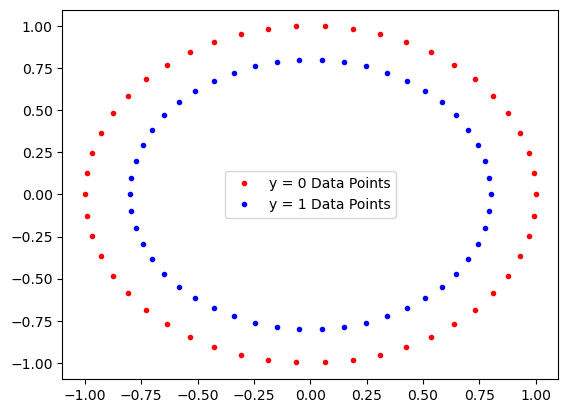

In [144]:
import matplotlib.pyplot as plt

plt.plot(circles_df[y == 0]["X1"], circles_df[y == 0]["X2"], "r.", label="y = 0 Data Points")
plt.plot(circles_df[y == 1]["X1"], circles_df[y == 1]["X2"], "b.", label="y = 1 Data Points")
plt.legend()
plt.show()

# Train Test Split

In [145]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
X_train.shape, y_train.shape
# X_train

((70, 2), (70,))

In [146]:
# X_train[y_train == 0][:,0]

# Plotting the Train Data

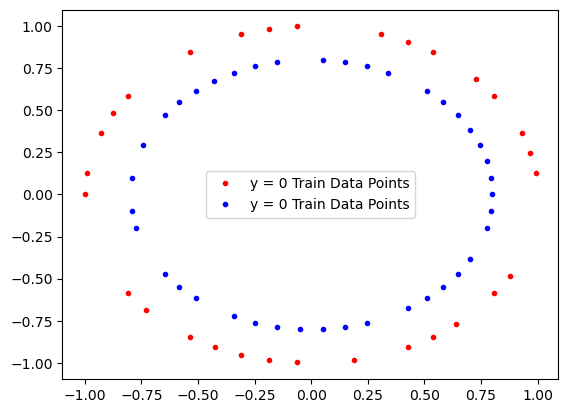

In [147]:
import matplotlib.pyplot as plt

plt.plot(X_train[y_train == 0][:,0], X_train[y_train == 0][:,1], "r.", label="y = 0 Train Data Points")
plt.plot(X_train[y_train == 1][:,0], X_train[y_train == 1][:,1], "b.", label="y = 0 Train Data Points")
plt.legend()
plt.show()

# Convert the Numpy Array into Tensors

In [148]:
type(X_train), X_train.shape, y_train.shape

(numpy.ndarray, (70, 2), (70,))

In [149]:
# y_train = y_train.reshape(-1,1)
type(X_train), X_train.shape, y_train.shape


(numpy.ndarray, (70, 2), (70,))

In [151]:
import torch

X_train_tensor = torch.from_numpy(X_train).type(torch.float)
y_train_tensor = torch.from_numpy(y_train).type(torch.float)

X_test_tensor = torch.from_numpy(X_test).type(torch.float)
y_test_tensor = torch.from_numpy(X_test).type(torch.float)

X_train_tensor.shape, y_train_tensor.shape

(torch.Size([70, 2]), torch.Size([70]))

a## 0. Architecture of a classification neural network

Before we get into writing code, let's look at the general architecture of a classification neural network.

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| **Input layer shape** (`in_features`) | Same as number of features (e.g. 5 for age, sex, haeight, weight, smoking status in heart disease prediction) | Same as binary classification |
| **Hidden layer(s)** | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| **Neurons per hidden layer** | Problem specific, generally 10 to 512 | Same as binary classification |
| **Output layer shape** (`out_features`) | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| **Hidden layer activation** | Usually [ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU) (rectified linear unit) but [can be many others](https://en.wikipedia.org/wiki/Activation_function#Table_of_activation_functions) | Same as binary classification |
| **Output activation** | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) ([`torch.sigmoid`](https://pytorch.org/docs/stable/generated/torch.sigmoid.html) in PyTorch)| [Softmax](https://en.wikipedia.org/wiki/Softmax_function) ([`torch.softmax`](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html) in PyTorch) |
| **Loss function** | [Binary crossentropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) in PyTorch) | Cross entropy ([`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) in PyTorch) |
| **Optimizer** | [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) (stochastic gradient descent), [Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) (see [`torch.optim`](https://pytorch.org/docs/stable/optim.html) for more options) | Same as binary classification |

Of course, this ingredient list of classification neural network components will vary depending on the problem you're working on.

But it's more than enough to get started.

We're going to get hands-on with this setup throughout this notebook.